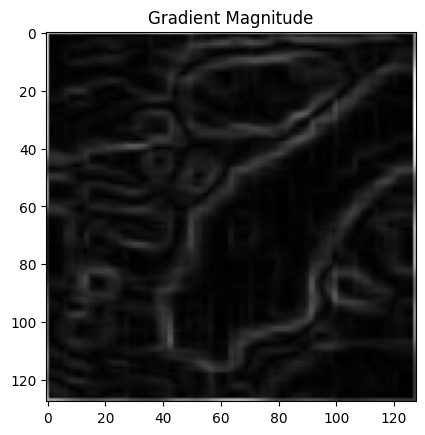

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Assume img is your input image with shape (H, W) and you've added batch and channel dimensions
# img should be a torch.Tensor of shape (1, 1, H, W)

path = "/home/jakobtroidl/Desktop/neural-volumes/logs/hemibrain-volume-yiqing-test/results_iteration_2/16514_20878_18760/result/result_2_psnr_27,274982439965715.png"
img = plt.imread(path)
img = torch.tensor(img, dtype=torch.float32).view(1, 1, 128, 128)


# Define Sobel filters
sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).view(1, 1, 3, 3)
sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).view(1, 1, 3, 3)

# Ensure the filters and the image are on the same device and dtype
sobel_x = sobel_x.to(img.device)
sobel_y = sobel_y.to(img.device)

# Apply filters to the image
grad_x = F.conv2d(img, sobel_x, padding=1)
grad_y = F.conv2d(img, sobel_y, padding=1)

# Compute the gradient magnitude
grad_magnitude = torch.sqrt(grad_x**2 + grad_y**2)

# Display the gradient magnitude for visualization
plt.imshow(grad_magnitude.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Gradient Magnitude')
plt.show()
